# Part I: Introduction

## 1. Backgroud

## 2. Problem Formulation

## 3. Aims

# Part II: Dataset

## 1. Dataset Description

In [1]:
import pandas as pd

***Description***

We are utilizing the [S&P 500 stock data](https://www.kaggle.com/datasets/camnugent/sandp500) dataset from Kaggle for our analysis. This dataset, last updated in 2018, is a comprehensive collection of historical stock prices for all companies currently listed on the S&P 500 index. The data spans a period of 5 years, providing a rich source of information for our study.

The dataset is well-structured and can be divided to analyze each individual company separately. This is facilitated by the `individual_stocks_5yr` folder, which contains data files for individual stocks. Each file is labelled by the respective company's stock ticker name, making it easy to locate and analyze data for a specific company.

Each file in the dataset contains the following columns:

- `Date`: This column records the date of the trading day in the format: yy-mm-dd. It allows us to track the stock's performance over time.
- `Open`: This column records the price of the stock at market open. This data is from the NYSE, so all prices are in USD. It provides a starting point for the day's trading.
- `High`: This column records the highest price the stock reached during the trading day. It gives us an idea of the stock's potential for the day.
- `Low`: This column records the lowest price the stock reached during the trading day. It provides insight into the stock's risk for the day.
- `close` : Closing price of the stock at the end of the trading day. Tt is a commonly used reference point for investors to assess the performance of a particular stock over time.
- `Volume`: This column records the number of shares traded during the trading day. It gives us an idea of the stock's liquidity and popularity.
- `Name`: This column records the ticker name of the stock. It allows us to identify the stock.

To provide a more focused context for this project, our team has chosen to analyze a specific company - Apple, one of the world's largest technology companies. Its stock is listed on the index as AAPL. The dataset we're using for this analysis is named `AAPL_data.csv`. Following is an overview visualization of the dataset:

In [2]:
df = pd.read_csv("dataset/AAPL_data.csv")
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


A noteworthy characteristic of this dataset is the data column. Notably, the date `08-02-2013` falls on a Friday, and the subsequent date in the dataset, `11-02-2013`, is a Monday. This suggests that the data is recorded only on **weekdays**.

***Key Features***

Some statistic about this dataset: 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [4]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


Originally, there is no null value

In [5]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In this project context, we are working with time seri analysis so we just need to use two columns: `date` and `close`.

In [6]:
df = df[['date', 'close']]
df.head()

,date,close
0,2013-02-08,67.8542
1,2013-02-11,68.5614
2,2013-02-12,66.8428
3,2013-02-13,66.7156
4,2013-02-14,66.6556


QQ Plot

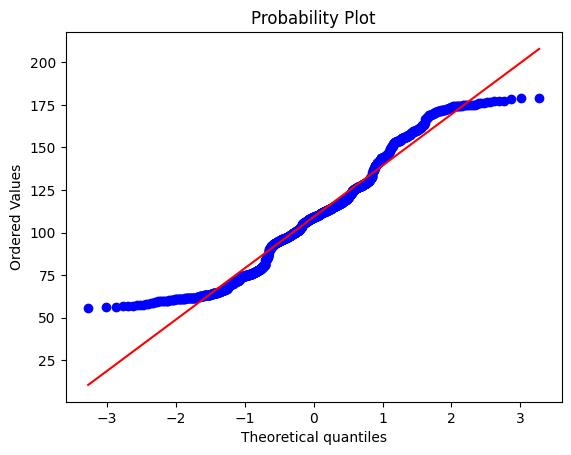

In [22]:
import scipy.stats 
import pylab

#Plot the QQ plot
scipy.stats.probplot(df['close'], dist="norm", plot=pylab)
pylab.show()

A Q-Q (quantile-quantile) plot is a graphical tool that helps us assess if a dataset follows a particular theoretical distribution. It plots the quantiles of the dataset against the quantiles of the chosen theoretical distribution.

If the data follows the chosen distribution, the points in the Q-Q plot will approximately lie on the line y = x. If the data does not follow the distribution, the points will deviate from this line.

&rarr; Some observation of `close` deviate significantly for the linear line indicating that the stock price does not follow the Normal Distribution

## 2. Preprocessing

### 1. Set the data column as index

Set the `date` column of the DataFrame df as the index of the DataFrame

In [8]:
# Ensure that 'date' is a datetime object
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)


`inplace=True`: specifies that the operation should be performed on the DataFrame df itself, rather than returning a new DataFrame with the specified changes

By setting the index, we are essentially specifying which column should be used to label/indentify the rows of the DataFrame.

The date column in this dataset is already in the default format: mm/dd/yyyy. However, if another dataset uses the format dd/mm/yyyy, we would need to specify the parameter dayfirst=True.

Look again the dataset, now the `date` was marked as index instead of a numerical order column as previous

In [9]:
df.head()

,close
date,
2013-02-08,67.8542
2013-02-11,68.5614
2013-02-12,66.8428
2013-02-13,66.7156
2013-02-14,66.6556


Start date and End date

In [10]:
df.index.min(), df.index.max()

(Timestamp('2013-02-08 00:00:00'), Timestamp('2018-02-07 00:00:00'))

*`date` is now index so we can not use df[`date`] anymore*

### 2. Set the frequency

All time periods must be equals and clearly definded, which would result in a constant Frequency

As highlighted in the previous section, the data is recorded exclusively on weekdays. Therefore, we will set the frequency to 'business day', denoted as `B` which is from Monday to Friday.

In [11]:

# Set the frequency of the DataFrame index
df = df.asfreq('B') # 'B' is the business day frequency

Check agin the null value in the dataset

In [12]:
df.isnull().sum()

close    45
dtype: int64

We observe 45 missing values, which is unexpected. As previously mentioned, the original dataset records dates only on weekdays. Therefore, when we set the frequency to 'B' for business days, we shouldn't encounter any missing values. To investigate this discrepancy, we will print out these missing values.

In [13]:
# Find the dates where 'Close' is null
missing_dates = df[df['close'].isnull()].index

# Print out the missing dates and the day of the week
for date in missing_dates:
    print(f"Date: {date}, Day of Week: {date.day_name()}")

Date: 2013-02-18 00:00:00, Day of Week: Monday
Date: 2013-03-29 00:00:00, Day of Week: Friday
Date: 2013-05-27 00:00:00, Day of Week: Monday
Date: 2013-07-04 00:00:00, Day of Week: Thursday
Date: 2013-09-02 00:00:00, Day of Week: Monday
Date: 2013-11-28 00:00:00, Day of Week: Thursday
Date: 2013-12-25 00:00:00, Day of Week: Wednesday
Date: 2014-01-01 00:00:00, Day of Week: Wednesday
Date: 2014-01-20 00:00:00, Day of Week: Monday
Date: 2014-02-17 00:00:00, Day of Week: Monday
Date: 2014-04-18 00:00:00, Day of Week: Friday
Date: 2014-05-26 00:00:00, Day of Week: Monday
Date: 2014-07-04 00:00:00, Day of Week: Friday
Date: 2014-09-01 00:00:00, Day of Week: Monday
Date: 2014-11-27 00:00:00, Day of Week: Thursday
Date: 2014-12-25 00:00:00, Day of Week: Thursday
Date: 2015-01-01 00:00:00, Day of Week: Thursday
Date: 2015-01-19 00:00:00, Day of Week: Monday
Date: 2015-02-16 00:00:00, Day of Week: Monday
Date: 2015-04-03 00:00:00, Day of Week: Friday
Date: 2015-05-25 00:00:00, Day of Week: Mond

None of the missing values fall on weekends, suggesting they might correspond to holidays or other non-trading days not included in the original dataset. Initially, these dates were not present in the dataset. However, when we resampled the data to business day frequency, these missing dates emerged.

Now we deal with the remainder missing values with the help of fillna() method. This method go through the dataset and fill out the missing values by different ways:

- Front Filling: Assign the value of the previous period. Ex: the day 8/1 is missing then it will be assigned the value of the day 7/1
- Back Filling:..........
- Assigning the same value: Assign the average to all the missing values within the timeseries. usually, filling by this way is not recommend in time seri since there are underlying time variance patterns in the data.



In [14]:
# Handle any missing values that may have been introduced by asfreq
df['close'].interpolate(method='time', inplace=True)
df.isnull().sum()

/tmp/ipykernel_61768/1446985660.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['close'].interpolate(method='time', inplace=True)


close    0
dtype: int64

### 3. Spliting the dateset

An importance note that timeseries data relies on keeping the chronological order/ time order of the values. Therefore, data in timeseries should be uninterrupted sequences of values →The training set should include all values from the beggining to a specific point in time 

In [15]:
size = int(len(df)*0.8)
df_train = df.iloc[:size]  #df is the training set, account for 80% of the dataset
df_test = df.iloc[size:]

Check for two new set

In [16]:
df_train.tail()

,close
date,
2017-02-01,128.75
2017-02-02,128.53
2017-02-03,129.08
2017-02-06,130.29
2017-02-07,131.53


In [17]:
df_test.head()

,close
date,
2017-02-08,132.04
2017-02-09,132.42
2017-02-10,132.12
2017-02-13,133.29
2017-02-14,135.02


### 4. Check Stationary

1. visualize

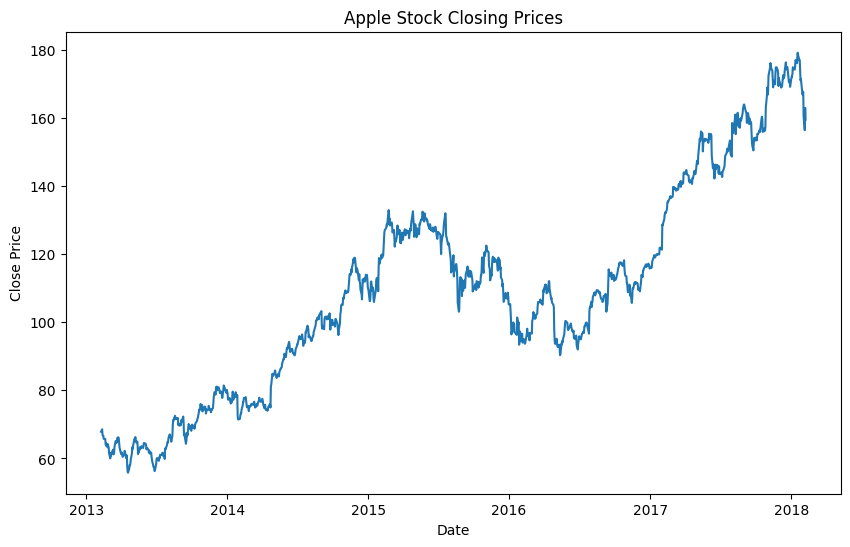

In [18]:
import matplotlib.pyplot as plt


# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(df['close'])
plt.title('Apple Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

Decomposite 

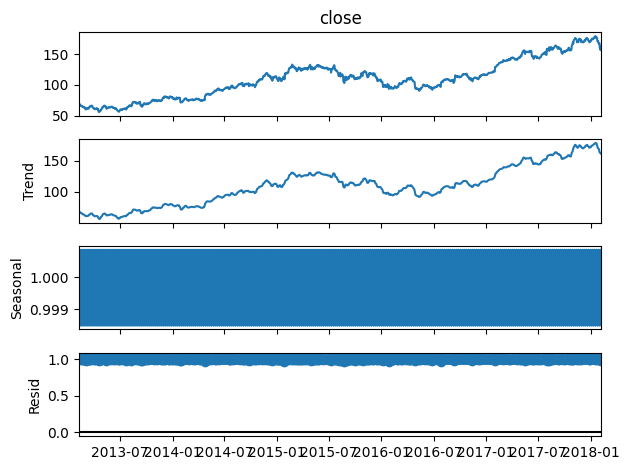

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['close'], model='multiplicative')

# Plot the original series, trend, seasonal component, and residuals 
result.plot()
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller

# Stationarity check
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

check_stationarity(df['close'])

# If p-value > 0.05, the series is not stationary
# In that case, you need to make the series stationary

# Making the series stationary by differencing
df['close_diff'] = df['close'] - df['close'].shift(1)
df.dropna(inplace=True)

# Check stationarity of the differenced series
check_stationarity(df['close_diff'])

ADF Statistic: -0.660437
p-value: 0.856733
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
ADF Statistic: -17.326398
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
